In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import bullet, dataset, distance, error, historical, output, ranking, report, speed, split, time
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

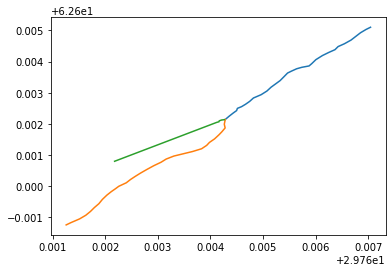

1228.617344478807
183.7111351398322


In [2]:
target_trajectory, data = dataset.load_users_trajectories_with_target(898, 1393786760018)
head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.75)

head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = historical.predict_by_picking_tail_with_similar_time_of_day(data, head, 60, 10)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

plt.plot(head_y[-32:], head_x[-32:])
plt.plot(tail_y[:32], tail_x[:32])
plt.plot(pred_y, pred_x)
plt.show()

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

In [3]:
SECONDS = 60 # 1 minute
USER_ID = 898
RATIO = 0.5
THRESHOLD = 10
trajectory_ids = dataset.get_list_of_users_trajectory_ids(USER_ID)

errors = []
failed = 0

for trajectory_id in trajectory_ids:
    print(trajectory_id, end='')
    target_trajectory, data = dataset.load_users_trajectories_with_target(USER_ID, trajectory_id)
    head, tail = split.split_trajectory_with_overlap(target_trajectory, RATIO)
    prediction = historical.predict_by_picking_tail_with_similar_time_of_day(data, head, SECONDS, THRESHOLD)

    if np.size(prediction, 0) < 2:
        failed += 1
        print(' failed')
        continue

    pred_dist = distance.calculate_trajectory_length_in_meters(prediction)

    if len(prediction) > 0 and np.size(prediction, 0) > 0 and np.size(prediction, 1) == 4 and pred_dist > 0:
        error_amount = error.calculate_error_vector(tail, prediction)[:, 4]
        errors.append(error_amount)
        print(' success', pred_dist, len(error_amount), sum(error_amount))
    else:
        failed += 1
        print(' failed')

errors_sum = list(map(sum, errors))

print(
    '\nERROR STATISTICS',
    '\naverage\t\t\t', np.average(errors_sum),
    '\nmedian\t\t\t', np.median(errors_sum),
    '\nstandard deviation\t', np.std(errors_sum),
    '\nfailed predictions\t', failed
)

1399399033400 success 95.38266250601703 7 264.88963694809246
1412515702026 success 250.46291093265592 7 493.57354351150684
1413382616849 failed
1379951571859 success 86.55188130902343 7 172.57945152670757
1379694392068 success 274.3516018191749 8 705.6223387982839
1407168712392 failed
1400436362445 success 296.19742861412306 6 706.499292669132
1407593205810 success 234.46230945967375 6 170.80805934280076
1396953544784 success 119.24387167793293 5 340.2418703424521
1408208026280 success 358.50433918609 9 1165.8347429648254
1404054152819 success 216.21572890865198 6 189.09826657536877
1401891357857 success 314.829973241425 7 288.08031067564343
1394042416405 success 89.34741763600385 6 270.95959693406974
1380211927794 success 73.6375098191395 7 65.16858920941968
1377681725292 success 287.27205847467235 7 646.4039664302486
1397840479593 failed
1398930716368 success 221.88439933466063 6 228.77759965887222
1396260541459 success 221.15836984333671 6 151.71523381759096
1404467994679 success 17

1397307370014 success 193.80060296672423 6 138.93799783007842
1397315289434 success 216.00826595466899 8 281.5076327100212
1401555619182 failed
1379750070367 failed
1404064273726 success 86.44750358863732 5 221.5816620915431
1402678393735 success 42.59102548928365 5 122.52773787941217
1377788791350 failed
1404468390177 success 230.11180057830327 7 595.7660954718747
1408288153631 success 245.50909799490591 7 234.17935610999587
1411964134234 success 92.968143572944 6 345.0854332440125
1401629100713 failed
1378655206255 success 258.20509427151427 7 269.66620689542265
1402158474401 failed
1379302234528 success 63.46831089013406 6 110.25506344244708
1412417616700 success 90.37159432990356 4 216.49087599283934
1378141680529 success 112.70245178884818 7 279.30193466948987
1404389296311 success 266.38578588915476 6 196.2693049994119
1377503869598 success 242.57124109160375 6 549.5154244884559
1405012891914 success 79.12790495710223 5 152.30998602282355
1399295150237 success 241.73416441284638 